## 讀取資料

In [1]:
# 以愛麗絲夢遊仙境為例
with open('carroll-alice.txt', 'r', encoding='UTF-8') as f:
    content = f.read()
print(content)

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

## 資料前處理

### 符號清洗

In [11]:
import re # 引入正規表達式套件，用來清洗符號

def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # 移除換行符
    text = re.sub(r'\s+', ' ', text)  # 移除多餘的空格
    text = re.sub(r'\[[0-9]*\]', '', text)  # 移除參考文獻標記
    return text

cleaned_content = clean_text(content)
print(cleaned_content)


[Alice's Adventures in Wonderland by Lewis Carroll 1865] CHAPTER I. Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?' So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but whe

### 分詞與詞性標注

In [14]:
import nltk
nltk.download('punkt') # 第一次使用的時候需要下載
nltk.download('averaged_perceptron_tagger')

tokens = nltk.word_tokenize(cleaned_content)
pos_tags = nltk.pos_tag(tokens)

print(pos_tags)

[nltk_data] Downloading package punkt to /Users/owo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/owo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('[', 'JJ'), ('Alice', 'NNP'), ("'s", 'POS'), ('Adventures', 'NNS'), ('in', 'IN'), ('Wonderland', 'NNP'), ('by', 'IN'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('1865', 'CD'), (']', 'NNP'), ('CHAPTER', 'NNP'), ('I', 'PRP'), ('.', '.'), ('Down', 'RP'), ('the', 'DT'), ('Rabbit-Hole', 'JJ'), ('Alice', 'NNP'), ('was', 'VBD'), ('beginning', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('very', 'RB'), ('tired', 'JJ'), ('of', 'IN'), ('sitting', 'VBG'), ('by', 'IN'), ('her', 'PRP$'), ('sister', 'NN'), ('on', 'IN'), ('the', 'DT'), ('bank', 'NN'), (',', ','), ('and', 'CC'), ('of', 'IN'), ('having', 'VBG'), ('nothing', 'NN'), ('to', 'TO'), ('do', 'VB'), (':', ':'), ('once', 'RB'), ('or', 'CC'), ('twice', 'VB'), ('she', 'PRP'), ('had', 'VBD'), ('peeped', 'VBN'), ('into', 'IN'), ('the', 'DT'), ('book', 'NN'), ('her', 'PRP$'), ('sister', 'NN'), ('was', 'VBD'), ('reading', 'VBG'), (',', ','), ('but', 'CC'), ('it', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('pictures', 'NNS'), ('or', 'CC'), ('conversations', 'NNS'

### 停用詞的移除

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

print(filtered_tokens)

[nltk_data] Downloading package stopwords to /Users/owo/nltk_data...


['[', 'Alice', "'s", 'Adventures', 'Wonderland', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', '.', 'Rabbit-Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', ',', 'nothing', ':', 'twice', 'peeped', 'book', 'sister', 'reading', ',', 'pictures', 'conversations', ',', "'and", 'use', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'conversation', '?', "'", 'considering', 'mind', '(', 'well', 'could', ',', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', ')', ',', 'whether', 'pleasure', 'making', 'daisy-chain', 'would', 'worth', 'trouble', 'getting', 'picking', 'daisies', ',', 'suddenly', 'White', 'Rabbit', 'pink', 'eyes', 'ran', 'close', '.', 'nothing', 'remarkable', ';', 'Alice', 'think', 'much', 'way', 'hear', 'Rabbit', 'say', ',', "'Oh", 'dear', '!', 'Oh', 'dear', '!', 'shall', 'late', '!', "'", '(', 'thought', 'afterwards', ',', 'occurred', 'ought', 'wondered', ',', 'time', 'seemed', 'quite', 'natural', ')', ';', 'Rabbit', 'actually', 'TOOK', 'WATCH

[nltk_data]   Unzipping corpora/stopwords.zip.


### 詞頻統計

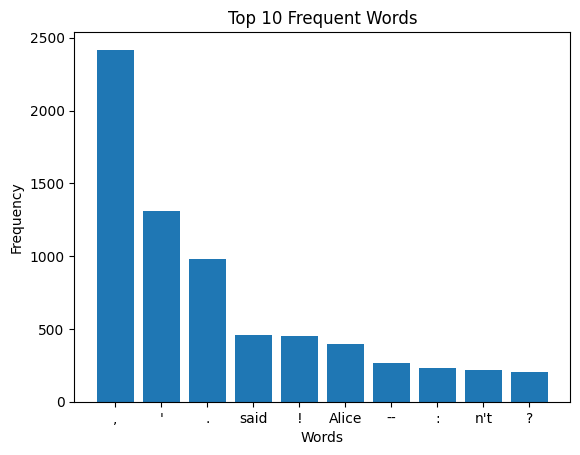

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

word_freq = Counter(filtered_tokens)
top_words = word_freq.most_common(10)

# 繪製詞頻直方圖
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Words')
plt.show()

## 關鍵詞提取

### 資料讀取

In [22]:
# 讀取資料, 對每一篇文章進行前處理
from glob import glob

document_list = glob("data/*.txt")

documents = []
for document_path in document_list:
    with open(document_path, 'r', encoding='UTF-8') as f:
        content = f.read()
        cleaned_content = clean_text(content)
        tokens = nltk.word_tokenize(cleaned_content)
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
        documents.append(" ".join(filtered_tokens))
documents

["get started , Python sections linked left -- Python Set get Python installed machine , Python Introduction introduction language , Python Strings starts coding material , leading first exercise . end written section includes link code exercise section 's material . lecture videos parallel written materials , introducing Python , strings , first exercises , . Google , material makes intensive 2-day class , videos organized day-1 day-2 sections . material created Nick Parlante working engEDU group Google . Special thanks help Google colleagues John Cox , Steve Glassman , Piotr Kaminksi , Antoine Picard . finally thanks Google director Maggie Johnson enlightened generosity put materials internet free Creative Commons Attribution 2.5 license -- share enjoy !",
 "Welcome Google 's Python online tutorial . based introductory Python course offered internally . Originally created Python 2.4 days , 've tried keep content universal exercises relevant , even newer releases . mentioned setup pag

In [23]:
# 使用TF/IDF進行關鍵詞提取
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() # 初始化TF/IDF向量器
tfidf_matrix = vectorizer.fit_transform(documents) # 計算TF/IDF值
keywords = vectorizer.get_feature_names_out() # 提取關鍵詞

# 找出TF/IDF值最高的前10個關鍵詞
top_keywords = tfidf_matrix.toarray().argsort()[:, -10:][:, ::-1]

# 顯示每篇文章的關鍵詞
for i in range(len(documents)):
    print(f"Document {i+1}:")
    for j in top_keywords[i]:
        print(f"\t{keywords[j]}", end=" ")
    print()

Document 1:
	python 	google 	material 	day 	written 	thanks 	section 	sections 	exercise 	materials 
Document 2:
	python 	offered 	recommend 	future 	content 	covers 	setup 	mentioned 	online 	relevant 
Document 3:
	ll 	python 	time 	course 	need 	learning 	get 	know 	started 	languages 


In [40]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer() # 初始化詞頻向量器
word_count_matrix = vectorizer.fit_transform(documents) # 計算詞頻矩陣
lda = LatentDirichletAllocation(n_components=2, random_state=16) # 初始化LDA模型
lda.fit(word_count_matrix) # 擬合LDA模型
keywords = vectorizer.get_feature_names_out() # 提取關鍵詞

# 找出每個主題的前10個關鍵詞
top_keywords = lda.components_.argsort()[:, -10:][:, ::-1]

# 顯示每個主題的關鍵詞
for i in range(len(top_keywords)):
    print(f"Topic {i+1}:")
    for j in top_keywords[i]:
        print(f"\t{keywords[j]}", end=" ")
    print()

# 顯示每個主題的文章
for i in range(len(documents)):
    print(f"Document {i+1}: Topic {lda.transform(word_count_matrix[i])[0].argmax()+1}")

Topic 1:
	python 	ll 	course 	time 	learning 	know 	started 	get 	need 	let 
Topic 2:
	python 	google 	material 	day 	first 	strings 	written 	materials 	section 	sections 
Document 1: Topic 2
Document 2: Topic 2
Document 3: Topic 1


In [43]:
text = """
魯鎭的酒店的格局，是和別處不同的：都是當街一個曲尺形的大櫃臺，櫃裏面豫備着熱水，可以隨時溫酒。做工的人，傍午傍晚散了工，每每花四文銅錢，買一碗酒，——這是二十多年前的事，現在每碗要漲到十文，——靠櫃外站着，熱熱的喝了休息；倘肯多花一文，便可以買一碟鹽煮筍，或者茴香豆，做下酒物了，如果出到十幾文，那就能買一樣葷菜，但這些顧客，多是短衣幫，大抵沒有這樣闊綽。只有穿長衫的，纔踱進店面隔壁的房子裏，要酒要菜，慢慢地坐喝。

我從十二歲起，便在鎭口的咸亨酒店裏當夥計，掌櫃說，樣子太傻，怕侍候不了長衫主顧，就在外面做點事罷。外面的短衣主顧，雖然容易說話，但嘮嘮叨叨纏夾不清的也很不少。他們往往要親眼看着黃酒從罎子裏舀出，看過壺子底裏有水沒有，又親看將壺子放在熱水裏，然後放心：在這嚴重監督下，羼水也很爲難。所以過了幾天，掌櫃又說我幹不了這事。幸虧薦頭的情面大，辭退不得，便改爲專管溫酒的一種無聊職務了。

我從此便整天的站在櫃臺裏，專管我的職務。雖然沒有什麼失職，但總覺得有些單調，有些無聊。掌櫃是一副凶臉孔，主顧也沒有好聲氣，教人活潑不得；只有孔乙己到店，纔可以笑幾聲，所以至今還記得。

孔乙己是站着喝酒而穿長衫的唯一的人。他身材很高大；青白臉色，皺紋間時常夾些傷痕；一部亂蓬蓬的花白的鬍子。穿的雖然是長衫，可是又髒又破，似乎十多年沒有補，也沒有洗。他對人說話，總是滿口之乎者也，教人半懂不懂的。因爲他姓孔，別人便從描紅紙上的「上大人孔乙己」這半懂不懂的話裏，替他取下一個綽號，叫作孔乙己。孔乙己一到店，所有喝酒的人便都看着他笑，有的叫道，「孔乙己，你臉上又添上新傷疤了！」他不回答，對櫃裏說，「溫兩碗酒，要一碟茴香豆。」便排出九文大錢。他們又故意的高聲嚷道，「你一定又偷了人家的東西了！」孔乙己睜大眼睛說，「你怎麼這樣憑空汚人清白……」「什麼清白？我前天親眼見你偷了何家的書，吊着打。」孔乙己便漲紅了臉，額上的青筋條條綻出，爭辯道，「竊書不能算偷……竊書！……讀書人的事，能算偷麼？」接連便是難懂的話，什麼「君子固窮」，什麼「者乎」之類，引得衆人都鬨笑起來：店內外充滿了快活的空氣。

聽人家背地裏談論，孔乙己原來也讀過書，但終於沒有進學，又不會營生；於是愈過愈窮，弄到將要討飯了。幸而寫得一筆好字，便替人家鈔鈔書，換一碗飯吃。可惜他又有一樣壞脾氣，便是好喝懶做。坐不到幾天，便連人和書籍紙張筆硯，一齊失蹤。如是幾次，叫他鈔書的人也沒有了。孔乙己沒有法，便免不了偶然做些偷竊的事。但他在我們店裏，品行卻比別人都好，就是從不拖欠；雖然間或沒有現錢，暫時記在粉板上，但不出一月，定然還清，從粉板上拭去了孔乙己的名字。

孔乙己喝過半碗酒，漲紅的臉色漸漸復了原，旁人便又問道，「孔乙己，你當眞認識字麼？」孔乙己看着問他的人，顯出不屑置辯的神氣。他們便接着說道，「你怎的連半個秀才也撈不到呢？」孔乙己立刻顯出頹唐不安模樣，臉上籠上了一層灰色，嘴裏說些話；這回可是全是之乎者也之類，一些不懂了。在這時候，衆人也都鬨笑起來：店內外充滿了快活的空氣。

在這些時候，我可以附和着笑，掌櫃是決不責備的。而且掌櫃見了孔乙己，也每每這樣問他，引人發笑。孔乙己自己知道不能和他們談天，便只好向孩子說話。有一回對我說道，「你讀過書麼？」我略略點一點頭。他說，「讀過書，……我便考你一考。茴香豆的茴字，怎樣寫的？」我想，討飯一樣的人，也配考我麼？便回過臉去，不再理會。孔乙己等了許久，很懇切的說道，「不能寫罷？……我教給你，記着！這些字應該記着。將來做掌櫃的時候，寫賬要用。」我暗想我和掌櫃的等級還很遠呢，而且我們掌櫃也從不將茴香豆上賬；又好笑，又不耐煩，嬾嬾的答他道，「誰要你教，不是草頭底下一個來回的回字麼？」孔乙己顯出極高興的樣子，將兩個指頭的長指甲敲着櫃臺，點頭說，「對呀對呀！……回字有四樣寫法，你知道麼？」我愈不耐煩了，努着嘴走遠。孔乙己剛用指甲蘸了酒，想在櫃上寫字，見我毫不熱心，便又歎一口氣，顯出極惋惜的樣子。

有幾回，鄰舍孩子聽得笑聲，也趕熱鬧，圍住了孔乙己。他便給他們茴香豆喫，一人一顆。孩子喫完豆，仍然不散，眼睛都望着碟子。孔乙己着了慌，伸開五指將碟子罩住，彎腰下去說道，「不多了，我已經不多了。」直起身又看一看豆，自己搖頭說，「不多不多！多乎哉？不多也。」於是這一羣孩子都在笑聲裏走散了。

孔乙己是這樣的使人快活，可是沒有他，別人也便這麼過。

有一天，大約是中秋前的兩三天，掌櫃正在慢慢的結賬，取下粉板，忽然說，「孔乙己長久沒有來了。還欠十九個錢呢！」我纔也覺得他的確長久沒有來了。一個喝酒的人說道，「他怎麼會來？……他打折了腿了。」掌櫃說，「哦！」「他總仍舊是偷。這一回，是自己發昏，竟偷到丁舉人家裏去了。他家的東西，偷得的麼？」「後來怎麼樣？」「怎麼樣？先寫服辯，後來是打，打了大半夜，再打折了腿。」「後來呢？」「後來打折了腿了。」「打折了怎樣呢？」「怎樣？……誰曉得？許是死了。」掌櫃也不再問，仍然慢慢的算他的賬。

中秋之後，秋風是一天涼比一天，看看將近初冬；我整天的靠着火，也須穿上棉襖了。一天的下半天，沒有一個顧客，我正合了眼坐着。忽然間聽得一個聲音，「溫一碗酒。」這聲音雖然極低，卻很耳熟。看時又全沒有人。站起來向外一望，那孔乙己便在櫃臺下對了門檻坐着。他臉上黑而且瘦，已經不成樣子；穿一件破夾襖，盤着兩腿，下面墊一個蒲包，用草繩在肩上掛住；見了我，又說道，「溫一碗酒。」掌櫃也伸出頭去，一面說，「孔乙己麼？你還欠十九個錢呢！」孔乙己很頹唐的仰面答道，「這……下回還清罷。這一回是現錢，酒要好。」掌櫃仍然同平常一樣，笑着對他說，「孔乙己，你又偷了東西了！」但他這回卻不十分分辯，單說了一句「不要取笑！」「取笑？要是不偷，怎麼會打斷腿？」孔乙己低聲說道，「跌斷，跌，跌……」他的眼色，很像懇求掌櫃，不要再提。此時已經聚集了幾個人，便和掌櫃都笑了。我溫了酒，端出去，放在門檻上。他從破衣袋裏摸出四文大錢，放在我手裏，見他滿手是泥，原來他便用這手走來的。不一會，他喝完酒，便又在旁人的說笑聲中，坐着用這手慢慢走去了。

自此以後，又長久沒有看見孔乙己。到了年關，掌櫃取下粉板說，「孔乙己還欠十九個錢呢！」到第二年的端午，又說「孔乙己還欠十九個錢呢！」到中秋可是沒有說，再到年關也沒有看見他。

我到現在終於沒有見——大約孔乙己的確死了。

一九一九年三月。
"""

In [45]:
import jieba.analyse # jieba是一個中文文字處理的套件，可以用來斷詞、關鍵字提取、詞性標註等等

keywords = jieba.analyse.textrank(text, topK=10)
print("關鍵詞：", keywords)

關鍵詞： ['沒有', '掌櫃', '茴香豆', '粉板', '顯出', '知道', '樣子', '主顧', '碟子', '東西']


## 文字向量模型

### 訓練模型

In [61]:
sentences = text.split("\n")
sentences = [list(jieba.cut(s)) for s in sentences]
sentences = [s for s in sentences if len(s) > 0]
sentences

[['魯',
  '鎭',
  '的',
  '酒店',
  '的',
  '格局',
  '，',
  '是',
  '和',
  '別處',
  '不同',
  '的',
  '：',
  '都',
  '是',
  '當街',
  '一個',
  '曲尺形',
  '的',
  '大櫃',
  '臺',
  '，',
  '櫃',
  '裏',
  '面豫備',
  '着',
  '熱水',
  '，',
  '可以',
  '隨時',
  '溫酒',
  '。',
  '做工',
  '的',
  '人',
  '，',
  '傍午',
  '傍晚',
  '散',
  '了',
  '工',
  '，',
  '每每',
  '花',
  '四文',
  '銅錢',
  '，',
  '買',
  '一碗',
  '酒',
  '，',
  '—',
  '—',
  '這是',
  '二十多年',
  '前',
  '的',
  '事',
  '，',
  '現在',
  '每碗',
  '要漲',
  '到',
  '十文',
  '，',
  '—',
  '—',
  '靠櫃外',
  '站',
  '着',
  '，',
  '熱熱',
  '的',
  '喝',
  '了',
  '休息',
  '；',
  '倘肯',
  '多花',
  '一文',
  '，',
  '便',
  '可以',
  '買',
  '一碟',
  '鹽',
  '煮',
  '筍',
  '，',
  '或者',
  '茴香豆',
  '，',
  '做',
  '下酒',
  '物',
  '了',
  '，',
  '如果',
  '出到',
  '十幾文',
  '，',
  '那',
  '就',
  '能',
  '買',
  '一樣',
  '葷',
  '菜',
  '，',
  '但',
  '這些',
  '顧客',
  '，',
  '多',
  '是',
  '短衣',
  '幫',
  '，',
  '大抵',
  '沒有',
  '這樣',
  '闊綽',
  '。',
  '只有',
  '穿長',
  '衫',
  '的',
  '，',
  '纔',
  '踱',
  '進',
  '店面',
  '隔壁',
  '的',
  '

In [96]:
import gensim
from gensim.models import Word2Vec

sentences = [
                ["我", "喜歡", "吃", "蘋果"],
                ["我", "不", "喜歡", "吃", "香蕉"],
                ["我", "非常", "喜歡", "吃", "西瓜"],
                ["西瓜", "是", "綠色", "的", "水果"],
                ["香蕉", "是", "黃色", "的", "水果"],
                ["蘋果", "是", "紅色", "的", "水果"],
                ["水果", "是", "好吃", "的"],
                ["我", "喜歡", "吃", "水果"],
                ["樹葉", "是", "綠色", "的", "植物"],
                ["玫瑰", "是", "紅色", "的", "植物"],
                ["樹葉", "不", "是", "水果"]
        ] # 這邊使用的是簡單的例子，實際上要訓練的資料量要大很多

# 訓練Word2Vec模型
model = Word2Vec(sentences, window=5, min_count=1, epochs=100)

# 儲存模型
model.save("word2vec.model")

In [97]:
# 列出目前模型的詞彙
model.wv.key_to_index

{'是': 0,
 '水果': 1,
 '的': 2,
 '喜歡': 3,
 '吃': 4,
 '我': 5,
 '紅色': 6,
 '綠色': 7,
 '植物': 8,
 '西瓜': 9,
 '香蕉': 10,
 '不': 11,
 '蘋果': 12,
 '樹葉': 13,
 '黃色': 14,
 '非常': 15,
 '好吃': 16,
 '玫瑰': 17}

### 使用模型

In [102]:
# 計算詞語相似度
model = Word2Vec.load("word2vec.model")
similarity = model.wv.similarity('蘋果', '香蕉')
print("詞語相似度：", similarity)

詞語相似度： 0.019421164


In [100]:
similar_words = model.wv.most_similar('紅色', topn=3)
print("最相似的詞語：", similar_words)

最相似的詞語： [('的', 0.18244878947734833), ('好吃', 0.17055284976959229), ('吃', 0.061716411262750626)]


In [99]:
result = model.wv.most_similar(positive=['香蕉', '黃色'], negative=['西瓜'], topn=.)
print("類比推理結果：", result)

類比推理結果： [('玫瑰', 0.2922039330005646), ('喜歡', 0.20637944340705872), ('綠色', 0.17616428434848785), ('蘋果', 0.15340036153793335), ('樹葉', 0.0756344124674797)]
